# ResNet 50

You can read more about Resnet50 at Keras Applications page at [ResNet50 | Keras Applications](https://keras.io/api/applications/resnet/#resnet50-function)
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

### Dataset
The data used in this notebook is [Tomato Leaf Classification](https://www.kaggle.com/noulam/tomato)

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

# please make sure you change the path below when you implement it
train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/'
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [12]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5, # For experimental purpose I have kept this very low, please keep 10 or more in your model
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
574/574 [==============================] - 296s 515ms/step - loss: 1.8330 - accuracy: 0.4582 - val_loss: 1.9782 - val_accuracy: 0.4148
Epoch 2/5
574/574 [==============================] - 291s 508ms/step - loss: 1.7931 - accuracy: 0.4861 - val_loss: 1.8244 - val_accuracy: 0.5036
Epoch 3/5
574/574 [==============================] - 283s 493ms/step - loss: 1.5897 - accuracy: 0.5331 - val_loss: 1.6917 - val_accuracy: 0.5769
Epoch 4/5
574/574 [==============================] - 287s 500ms/step - loss: 1.5408 - accuracy: 0.5476 - val_loss: 2.5317 - val_accuracy: 0.4432
Epoch 5/5
574/574 [==============================] - 285s 496ms/step - loss: 1.6843 - accuracy: 0.5442 - val_loss: 1.4137 - val_accuracy: 0.6116


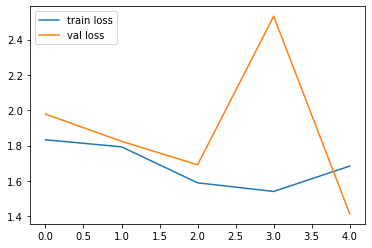

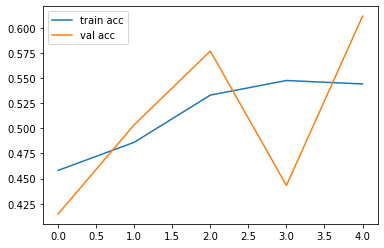

<Figure size 432x288 with 0 Axes>

In [15]:
#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# model.save('tomatoleaf_resnet50.h5')